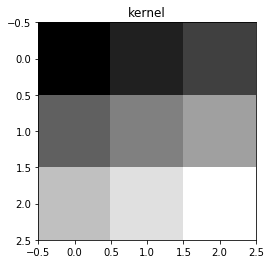

[[1 2 3]
 [4 5 6]
 [7 8 9]]


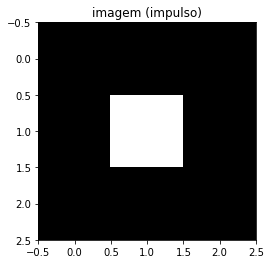

[[0 0 0]
 [0 1 0]
 [0 0 0]]


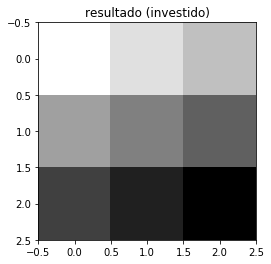

[[9 8 7]
 [6 5 4]
 [3 2 1]]


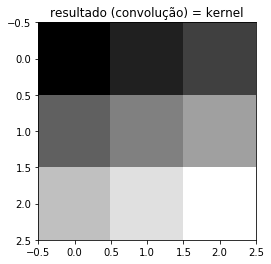

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
# 2A-L3 16
import cv2
from matplotlib import pyplot as plt
import numpy as np

kernel = np.array([[1,2,3], [4,5,6], [7,8,9]]).astype('uint8')
plt.imshow(kernel,'gray'); plt.title('kernel'); plt.show()
print(kernel)

img = np.zeros((3,3),'uint8')
img[1,1] = 1
plt.imshow(img,'gray'); plt.title('imagem (impulso)'); plt.show()
print(img)

res = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT) # BORDER_CONSTANT: preenche com zeros
plt.imshow(res, 'gray'); plt.title('resultado (investido)'); plt.show()
print(res)

res = cv2.filter2D(img, -1, cv2.flip(kernel,-1), borderType=cv2.BORDER_CONSTANT) # convolução: kernel flipped (-1 inverte x e y)
plt.imshow(res, 'gray'); plt.title('resultado (convolução) = kernel'); plt.show()
print(res)

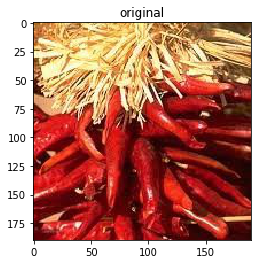

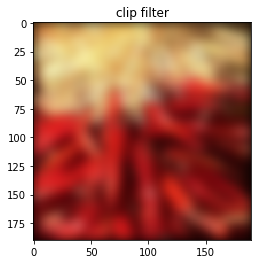

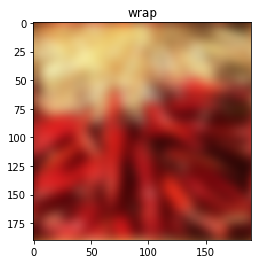

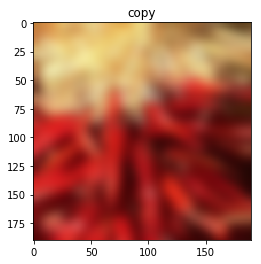

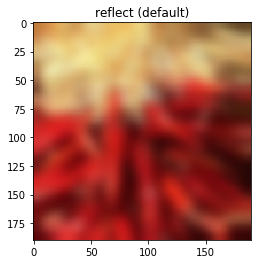

In [9]:
# 2A-L3 32
img = cv2.imread('images/peppers_2.jpeg')

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)); plt.title('original'); plt.show()

n = 31 # tamanho do filtro gaussiano

dst = cv2.GaussianBlur(img,(n,n),0, borderType=cv2.BORDER_CONSTANT)
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)); plt.title('clip filter'); plt.show()

dst = cv2.GaussianBlur(img,(n,n),0, borderType=cv2.BORDER_WRAP)
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)); plt.title('wrap'); plt.show()

dst = cv2.GaussianBlur(img,(n,n),0, borderType=cv2.BORDER_REPLICATE)
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)); plt.title('copy'); plt.show()

dst = cv2.GaussianBlur(img,(n,n),0, borderType=cv2.BORDER_REFLECT_101)
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)); plt.title('reflect (default)'); plt.show()

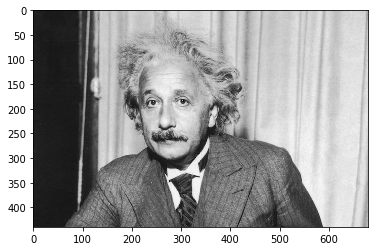

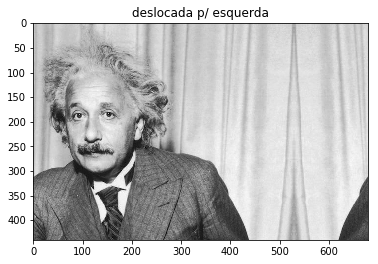

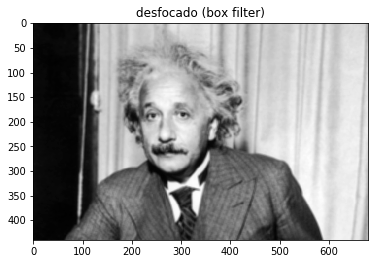

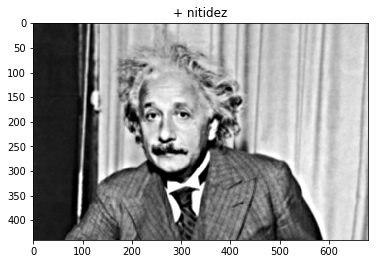

In [10]:
# 2A-L3 42
einstein = cv2.imread('images/einstein.jpeg',0)
#einstein = cv2.GaussianBlur(einstein, (11,11), 4)
plt.imshow(einstein,'gray'); plt.show()

h = np.zeros((301,301)); h[150,300] = 1
res = cv2.filter2D(einstein, -1, h) # correlação (não convolução), conserva tam original, default: reflete borda
plt.imshow(res,'gray'); plt.title('deslocada p/ esquerda'); plt.show()

h = np.ones((5,5)) / 5**2
blur = cv2.filter2D(einstein, -1, h) # correlação (não convolução), conserva tam original, default: reflete borda
plt.imshow(blur,'gray'); plt.title('desfocado (box filter)'); plt.show()

h = - np.ones((31,31)) / 31**2; h[15,15] += 2
sharp = cv2.filter2D(blur, -1, h) # correlação (não convolução), conserva tam original, default: reflete borda
plt.imshow(sharp,'gray'); plt.title('+ nitidez'); plt.show()

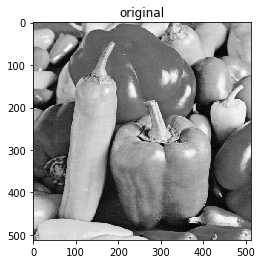

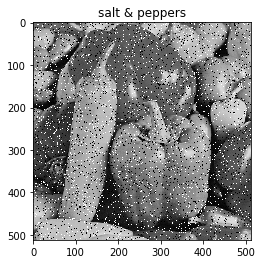

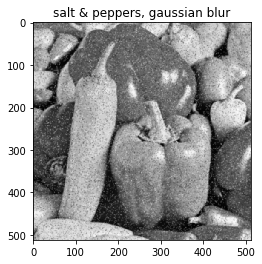

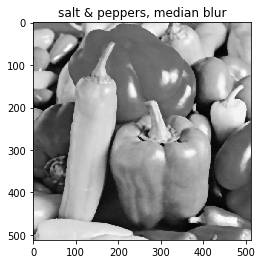

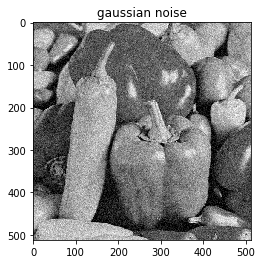

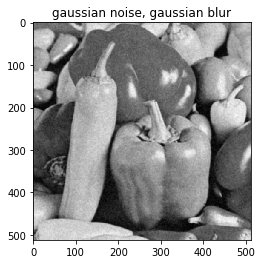

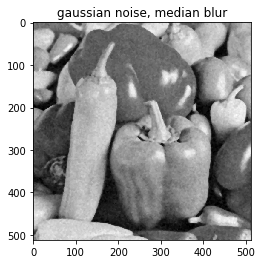

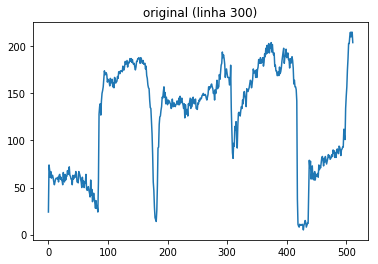

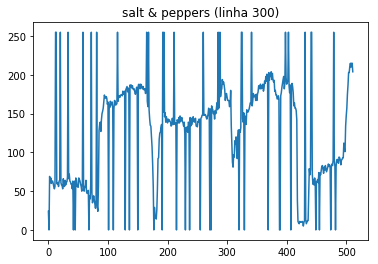

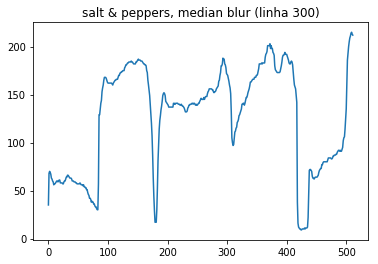

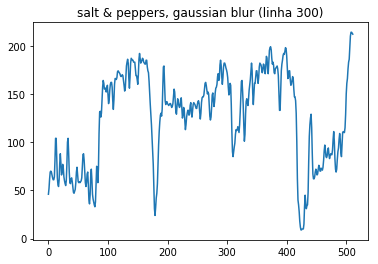

In [11]:
# 2A-L3 49

peppers = cv2.imread('images/peppers.png',0)
plt.imshow(peppers,'gray'); plt.title('original'); plt.show()

# salt & pepper noise
sp = peppers.copy()
rnd = np.random.rand(*peppers.shape) # uniforme [0,1]
sp[rnd > 0.95] = 255 # salt
sp[rnd < 0.05] = 0 # pepper
plt.imshow(sp,'gray'); plt.title('salt & peppers'); plt.show()

n = 5 # kernel size

spg = cv2.GaussianBlur(sp,(n,n),0)
plt.imshow(spg,'gray'); plt.title('salt & peppers, gaussian blur'); plt.show()

spm = cv2.medianBlur(sp,n)
plt.imshow(spm,'gray'); plt.title('salt & peppers, median blur'); plt.show()


gauss = peppers + np.random.randn(*peppers.shape)*20 # gaussian noise
gauss = gauss.clip(0,255).astype('uint8')
plt.imshow(gauss,'gray'); plt.title('gaussian noise'); plt.show()

dst = cv2.GaussianBlur(gauss,(n,n),0)
plt.imshow(dst,'gray'); plt.title('gaussian noise, gaussian blur'); plt.show()

dst = cv2.medianBlur(gauss,n)
plt.imshow(dst,'gray'); plt.title('gaussian noise, median blur'); plt.show()
# median blur não foi tão bom p/ remover ruído gaussiano quando foi p/ remover s&p (maior interferência na mediana)

plt.plot(peppers[300,:]); plt.title('original (linha 300)'); plt.show()
plt.plot(sp[300,:]); plt.title('salt & peppers (linha 300)'); plt.show()
plt.plot(spm[300,:]); plt.title('salt & peppers, median blur (linha 300)'); plt.show()
plt.plot(spg[300,:]); plt.title('salt & peppers, gaussian blur (linha 300)'); plt.show()

[0.0, -0.7071067811865475, -0.7071067811865475, 0.0, 0.4999999999999999, 0.816496580927726, 0.9999999999999998, 0.4999999999999999, -0.4999999999999999, -0.9999999999999998, -0.4999999999999999, 0.7071067811865475, 0.7071067811865475, 0.0, -0.7071067811865475, -0.7071067811865475]
6


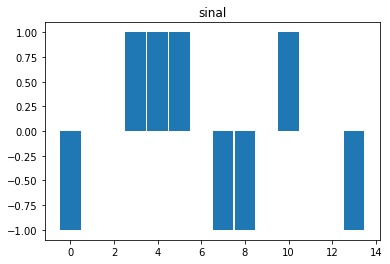

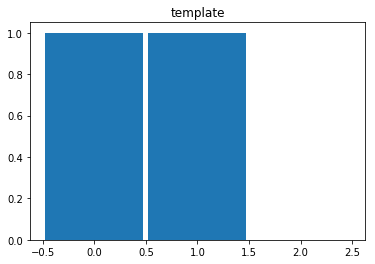

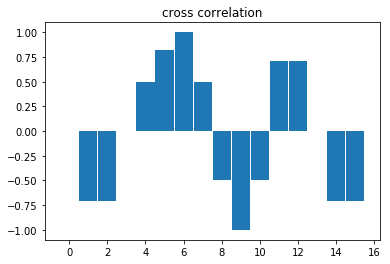

In [16]:
# Vídeo 131: Find template 1D

def normaliza(v):
    return v / np.linalg.norm(v,2) # divide pela norma L2 (euclidiana)

def find_template_1D(t, s):
    s = np.concatenate((np.zeros(len(t)-1), s, np.zeros(len(t)-1))) # inclui len(t)-1 0's no início e no final de s
    t = normaliza(t)
    r = []
    for i in range(len(s)-len(t)+1):
        f = normaliza(s[i:i+len(t)])
        r.append(np.dot(t,f))
    return r

s = np.array([-1, 0, 0, 1, 1, 1, 0, -1, -1, 0, 1, 0, 0, -1])
t = np.array([1, 1, 0])
r = find_template_1D(t,s)
print(r)
print(np.argmax(r))
plt.bar(range(0,len(s)),s,.95); plt.title('sinal'); plt.show()
plt.bar(range(0,len(t)),t,.95); plt.title('template'); plt.show()
plt.bar(range(0,len(r)),r,.95); plt.title('cross correlation'); plt.show()

(140, 40)


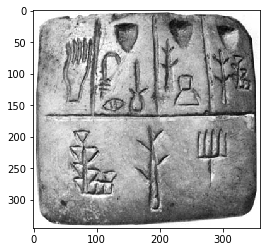

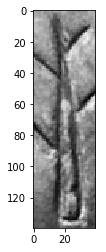

18.067293643951416 segundos


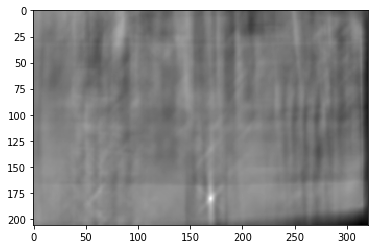

(170, 180)


In [21]:
import time

def find_template_2D(template, img):
    template = normaliza(template)
    r = np.zeros((img.shape[0] - template.shape[0] + 1, img.shape[1] - template.shape[1] + 1))
    for i in range(img.shape[0] - template.shape[0] + 1):
        for j in range(img.shape[1] - template.shape[1] + 1):
            f = normaliza( img[i:i+template.shape[0], j:j+template.shape[1]] )
            r[i][j] = np.dot(template.reshape((1,f.shape[0]*f.shape[1])), f.reshape((f.shape[0]*f.shape[1],1)))
    return r

img = cv2.imread('images/tablet.png',0)
template = img[180:320, 170:210]
print(template.shape)
plt.imshow(img,'gray'), plt.show()
plt.imshow(template,'gray'), plt.show()

e1 = time.time()
r = find_template_2D(template, img)
e2 = time.time()
print('{} segundos'.format(e2-e1))

plt.imshow(r,'gray'), plt.show()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(r)
print(max_loc)

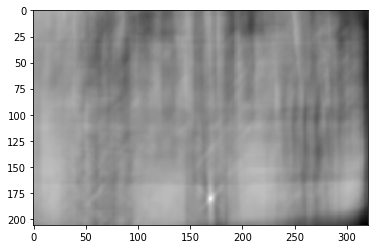

(170, 180)


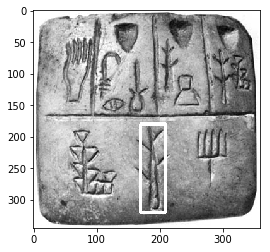

In [22]:
# Bem mais rápido usando opencv
res = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
plt.imshow(res,'gray'), plt.show()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(max_loc)

img = cv2.imread('images/tablet.png',0)
cv2.rectangle(img, max_loc, (max_loc[0]+template.shape[1], max_loc[1]+template.shape[0]), 255, 3)
plt.imshow(img,'gray'); plt.show()

# Métodos (não tem detalhes na documentação, nem comentários no código fonte, pontanto inferi pelo nome)
# cv2.TM_CCOEFF - coeficiente de correlação - sigma_tf/(sigma_t * sigma_f), onde sigma_tf = <t-ut, f-uf>/n
# cv2.TM_CCOEFF_NORMED - coeficiente de correlação (normalizado) - normaliza t e f antes
# cv2.TM_CCORR - cross correlation - <t, f> / n
# cv2.TM_CCORR_NORMED - cross correlation normalizado (acho que subtrai da média)
# cv2.TM_SQDIFF - soma dos quadrados das diferenças - <t-f, t-f>
# cv2.TM_SQDIFF_NORMED - soma dos quadrados das diferenças (normalizado) - normaliza t e f antes
#help(cv2.matchTemplate)